# Introducción a la Clasificación Multiclase  

### 

La clasificación multiclase, en ciertos aspectos, es un problema sencillo. Sin embargo, presenta desafíos interesantes que sirven como base para temas más avanzados en el aprendizaje automático, como la predicción estructurada. Hasta ahora, hemos abordado la clasificación binaria, donde los modelos lineales realizan predicciones simples basadas en la evaluación del signo de \(\theta^T x\), donde \(\theta\) representa el modelo aprendido.  

En la clasificación multiclase, el objetivo es construir un modelo capaz de asignar una única etiqueta de clase \(y\) a cada ejemplo \(x\). Dado un conjunto de datos \(D = \{(x_i, y_i)\}_{i=1}^{m}\), donde \(x_i \in \mathbb{R}^n\) y \(y_i \in \{0, 1, ..., k\}\), el modelo debe aprender a predecir la clase correcta a partir de la entrada. Este tipo de problemas requiere enfoques más expresivos que los utilizados en la clasificación binaria y es fundamental en diversas aplicaciones del aprendizaje automático, como el reconocimiento de imágenes, el procesamiento del lenguaje natural y la detección de objetos.

Given a data set $D = \{x_i , y_i \}^m _1$ , where $x_i \in R^n$ , $y_i \in \{0, 2, ..., n\}$, the task of
multiclass classification is to learn a model that outputs a single class label $y$ given an example $x$.

### Using a binary classifier as a black box, can we reduce the task of multiclass classification to the binary case? ###

## One-versus-all##

Let’s assume that our black-box algorithm is a linear classifier, and each class can be separated from all the rest labels. If we do this, we are basically decomposing the task to learning $n$ independent binary classifiers, and we know how to do this.


<img src="img_multiclass/img1.png" width="150" align="left" > 


<img src="img_multiclass/img2.png" width="500">


The only caveat is that when some points with a certain label are not linearly separable from the other, like shown in the figure below, this scheme cannot be used. Basically, we are concerned about the expressivity of this paradigm. It is not always possible to learn, because it is not always separable in the way we want. Even though it works well and is the commonly used method, there is no theoretical justification for it.

<img src="img_multiclass/img3.png" width="300">
Red points are not linearly separable from other points


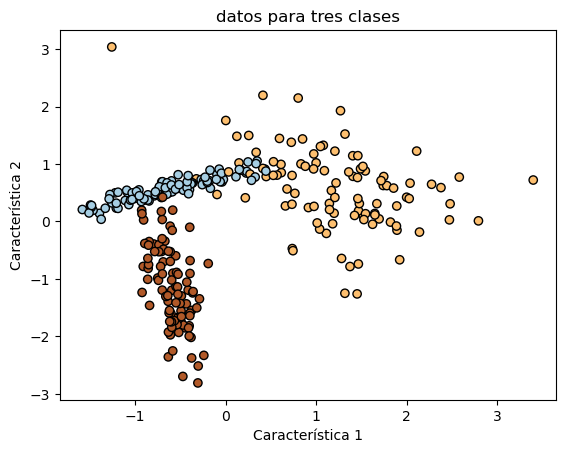

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Generar un conjunto de datos artificial con 3 clases
X, y = make_classification(n_samples=300, n_features=2, n_classes=3, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Escalar los datos para mejorar la convergencia del modelo
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Función para visualizar regiones de decisión
def plot_data(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")

plot_data(X, y, "datos para tres clases")

In [ ]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelos One-vs-All y Softmax
ova_model     = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=200)).fit(X_train, y_train)
softmax_model = LogisticRegression( solver='lbfgs', max_iter=200).fit(X_train, y_train)

# Función para visualizar regiones de decisión
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Paso de la malla
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")

# Graficar las regiones de decisión para ambos modelos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(ova_model, X, y, "Regresión Logística One-vs-All")

plt.subplot(1, 2, 2)
plot_decision_boundary(softmax_model, X, y, "Regresión Logística Softmax")

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot       as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
def createData(N=[500,500,500]):
    #generar puntos de forma artificial 
    #definir valor medio y desviacion
    mvalues=np.array([[0.7,3],[3,0.3],[4,4]])
    std = [0.8,0.6,0.4]
    X=np.array([])
    Y=np.array([])

    for ii in range(len(N)):
        x= std[ii]*np.random.randn(N[ii],2)+mvalues[ii]
        if ii==0:
            X= x
        else:
            X=np.vstack((X,x))
        y=np.ones(N[ii])*ii; 
        Y= np.append(Y,y)
    
    Y=Y.astype(int)    

    return X,Y

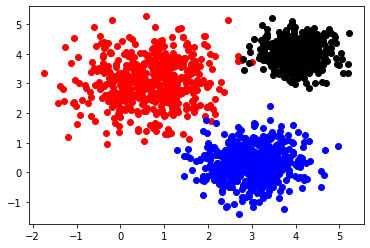

In [3]:
X,Y=createData()
#graficar
labels=np.unique(Y)

color='rbkg'
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y==ii,0],X[Y==ii,1],key)

In [4]:
X

array([[0.4565457 , 1.91841256],
       [1.2726005 , 3.08553039],
       [0.65994512, 3.15311774],
       ...,
       [4.05389884, 4.13035216],
       [3.61133456, 4.02557153],
       [3.84215897, 4.96048889]])

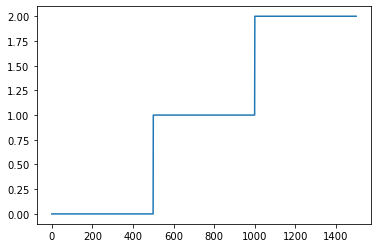

In [4]:
plt.plot(Y)

## Lets create one classifier to separate Class 0 from the others

In [5]:
########################
Y0=Y==0
Y0

array([ True,  True,  True, ..., False, False, False])

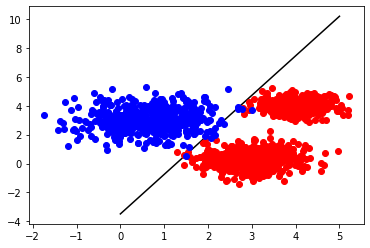

In [6]:
#create the classifier
clf0 = LogisticRegression(solver='lbfgs')
#Train the classifier
clf0.fit(X,Y0)

#show the results
#Plot parameters
theta0=clf0.intercept_ 
theta =clf0.coef_
xx = np.linspace(0, 5, 100)
yy=(-theta[0][0]*xx-theta0)/theta[0][1]
plt.plot(xx,yy,'k',linewidth=1.5)
labels=np.unique(Y0).astype(int)
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y0==ii,0],X[Y0==ii,1],key)

## Lets create one classifier to separate Class 1 from the others

In [7]:
########################
Y1=Y==1
Y1

array([False, False, False, ..., False, False, False])

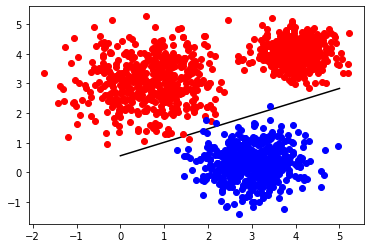

In [8]:
#create the classifier
clf1 = LogisticRegression(solver='lbfgs')
#Train the classifier
clf1.fit(X,Y1)

#show the results
#Plot parameters
theta0=clf1.intercept_ 
theta =clf1.coef_
xx = np.linspace(0, 5, 100)
yy=(-theta[0][0]*xx-theta0)/theta[0][1]
plt.plot(xx,yy,'k',linewidth=1.5)
labels=np.unique(Y1).astype(int)
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y1==ii,0],X[Y1==ii,1],key)

## Lets create one classifier to separate Class 2 from the others

In [9]:
########################
Y2=Y==2
Y2

array([False, False, False, ...,  True,  True,  True])

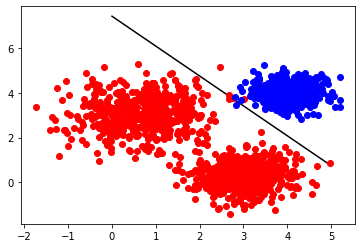

In [14]:
#create the classifier
clf2 = LogisticRegression(solver='lbfgs')
#Train the classifier
clf2.fit(X,Y2)

#show the results
#Plot parameters
theta0=clf2.intercept_ 
theta =clf2.coef_
xx = np.linspace(0, 5, 100)
yy=(-theta[0][0]*xx-theta0)/theta[0][1]
plt.plot(xx,yy,'k',linewidth=1.5)
labels=np.unique(Y0).astype(int)
for ii in labels:
        key = 'o'+color[ii]  
        plt.plot(X[Y2==ii,0],X[Y2==ii,1],key)

In [15]:
CLF = [clf0,clf1,clf2]

### Let's try the classifiers with the data

In [16]:
#validar 3 clasificadores
probs=np.zeros((Y.size,3))

for i in np.unique(Y):
    p_i=CLF[i].predict_log_proba(X)
    probs[:,i]=p_i[:,1]
    

In [15]:
probs

array([[-4.36833884e-04, -9.47059333e+00, -9.74562737e+00],
       [-5.07647204e-06, -1.33843313e+01, -1.10268914e+01],
       [-1.14325073e-04, -1.28890228e+01, -7.29743254e+00],
       ...,
       [-3.96966748e+00, -9.56511489e+00, -1.20424989e-03],
       [-7.12791052e+00, -5.53851191e+00, -2.31679841e-03],
       [-4.74086778e+00, -6.55485969e+00, -1.80605634e-02]])

In [22]:
x=X[0]
probs=np.zeros((1,3))
for i in np.unique(Y):
    p_i=CLF[i].predict_log_proba(x.reshape(1, -1))
    probs[:,i]=p_i[:,1]
    
print(probs)  
print('Clase real: ',Y[0])
print(np.max(probs))
print('Predicción: ',np.argmax(probs,1))

[[-4.66553426e-03 -2.82648919e+00 -1.46520531e+01]]
Clase real:  0
-0.0046655342608435384
Predicción:  [0]


## It is necesary to find the column where log_prob has the maximum value per row

In [14]:
Y_pred=np.argmax(probs,1)
Y_pred
acc = np.sum(Y==Y_pred)/Y.size*100
print(acc)

99.53333333333333


Let's measure the error

In [10]:
y =np.array([1,1,1,1,2,2,2,3,3,3])
yp=np.array([1,2,1,1,1,2,2,2,3,3])

aciertos = np.sum(y==yp)
aciertos/y.size*100

70.0

### In a more realistic scenario, we have two sets, a training set to estimate all the parameters and adjust the classifier and a testing set, to evaluate how good is the classifier

Let's create these two sets

In [25]:
#Take 100 samples per class
#first separate each class in a different matrix
C0=X[(Y==0),:]
C1=X[(Y==1),:]
C2=X[(Y==2),:]
LB0=Y[(Y==0)]
LB1=Y[(Y==1)]
LB2=Y[(Y==2)]
#Put toguether all training samples
X_train=np.vstack((C0[100:] ,C1[100:],C2[100:]))
Y_train=np.hstack((LB0[100:] ,LB1[100:],LB2[100:]))

#Put toguether all testing samples
X_test=np.vstack((C0[:100] ,C1[:100],C2[:100]))
Y_test=np.hstack((LB0[:100] ,LB1[:100],LB2[:100]))



In [28]:
X_test.shape

(300, 2)

Doing all the previous process again

In [31]:
####
CLFs = [LogisticRegression(solver='lbfgs'), LogisticRegression(solver='lbfgs'),
LogisticRegression(solver='lbfgs')]

#C=[LogisticRegression(solver='lbfgs') for i in range(200)]
#entrenar n clasificadores
for i in np.unique(Y):
    Y_i=Y_train==i
    CLFs[i].fit(X_train,Y_i)



#validar n clasificadores
probs=np.zeros((Y_test.size,3))
for i in np.unique(Y):
    p_i=CLFs[i].predict_log_proba(X_test)
    probs[:,i]=p_i[:,1]
    
    
Y_pred2=np.argmax(probs,1)

por2=(Y_test==Y_pred2).sum()/Y_test.size*100

In [32]:
por2

99.66666666666667

# Multi‐class classification: ##
## One-vs‐all

### Example with MNIST:
database of handwritten digits, available from
this page, has a training set of 60,000 examples, and a test set of 10,000
examples. The digits have been size-normalized and centered in a fixed-size
28x28 image.

In [12]:
!pip install mlxtend

Training set dimensions: 60000 x 784
Test set dimensions: 10000 x 784
5


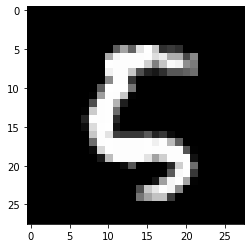

In [23]:
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(
        images_path='MNIST/train-images-idx3-ubyte', 
        labels_path='MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='MNIST/t10k-images-idx3-ubyte', 
        labels_path='MNIST/t10k-labels-idx1-ubyte')
        
print('Training set dimensions: %s x %s' % (X_train.shape[0],X_train.shape[1]))
print('Test set dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))

dim1=28
dim2=28     
image = X_train[2000].reshape((28,28))
print(y_train[2000])
plt.imshow(image,cmap="gray");


In [24]:
from process import *
#load data
print('[INFO] Normalize data .... ')
#dividir entre 255
X1=X_train/255
X2=X_test/255        
#definir el algoritmo para procesar imagenes
#normalizer = whiten()
normalizer = zca()

#entrenar el algoritmo de normalizar
normalizer.fit(X1)

#aplicar a los dos conjuntos
X1 = normalizer.transform(X1)
X2 = normalizer.transform(X2)

print('[INFO] Done ')


[INFO] Normalize data .... 
[INFO] Done 


5


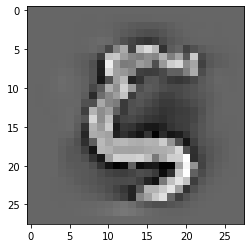

In [26]:
dim1=28
dim2=28     
image = X1[2000].reshape((28,28))
print(y_train[2000])
plt.imshow(image,cmap="gray");

In [6]:
import time
#aplicar el clasificador usando ZCA para procesar las imagenes

print('Train classifier: logistic regression using ZCA')
clf = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')
#entrenar

start = time.time()#inicar medida del tiempo
clf.fit(X1, y_train)
end = time.time() #tomar el tiempo final
#tomar el tiempo para entrenar clasificador
total=end - start
print('Tiempo total entrenamiento: ' + str(total) + ' segundos')

#evaluar
start = time.time()#inicar medida del tiempo
score = clf.score(X2, y_test)*100
end = time.time() #tomar el tiempo final

print('LogisticRegression score: %f'% score)
#tomar el tiempo para evaluar clasificador
total=end - start
print('Tiempo total evaluando: ' + str(total) + ' segundos')


Train classifier: logistic regression using ZCA
Tiempo total entrenamiento: 737.5360836982727 segundos
LogisticRegression score: 91.920000
Tiempo total evaluando: 0.045879364013671875 segundos


In [7]:
#aplicar el clasificador sin ningun tipo de proceso, usando las imagenes directamente
print('Train classifier: logistic regression with raw data')
clf = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')
#entrenar

start = time.time()#inicar medida del tiempo
clf.fit(X_train, y_train)
end = time.time() #tomar el tiempo final
#tomar el tiempo para entrenar clasificador
total=end - start
print('Tiempo total entrenamiento: ' + str(total) + ' segundos')

#evaluar
start = time.time()#inicar medida del tiempo
score = clf.score(X_test, y_test)*100
end = time.time() #tomar el tiempo final

print('LogisticRegression score: %f'% score)
#tomar el tiempo para evaluar clasificador
total=end - start
print('Tiempo total evaluando: ' + str(total) + ' segundos')


Train classifier: logistic regression with raw data
Tiempo total entrenamiento: 7808.546591520309 segundos
LogisticRegression score: 91.820000
Tiempo total evaluando: 0.05663132667541504 segundos


In [11]:
from sklearn.neighbors import KNeighborsClassifier

#logistic = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=3)


#train 
start = time.time()#inicar medida del tiempo
knn.fit(X1, y_train)
end = time.time() #tomar el tiempo final
total=end - start

print('Tiempo total entrenamiento: ' + str(total) + ' segundos')

start = time.time()#inicar medida del tiempo
score= knn.score(X2, y_test)
end = time.time() #tomar el tiempo final
total=end - start

print('Tiempo total evaluando: ' + str(total) + ' segundos')


print('KNN score: %f' % score*100)



Tiempo total entrenamiento: 7.523693323135376 segundos
Tiempo total evaluando: 1075.4904870986938 segundos
KNN score: 0.919300
